# Manual Neural Network

### Operation Class
1. Input Nodes
2. Output Nodes
3. Global Default graph variable
4. Compute
    - overwritten by extended classes

# Operation

In [22]:
class Operation():
    def __init__(self, input_node=[]):
        
        self.input_node = input_node
        self.output_node = []
        
        for node in input_node:
            node.output_node.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [23]:
class add(Operation):
    
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var+y_var
        

In [24]:
class multiply(Operation):
    
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var*y_var
        

In [25]:
class matmul(Operation):     #matrix multiplication
    
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)
        

### Placeholder
An "empty" node that needs a value to be provided to compute output

### variables 
Changeable parameter of Graph

### Graph
Global variables connecting variables and placeholder to an operations

In [40]:
class Placeholder():
    
    def __init__(self):
        
        self.output_node = []
        
        _default_graph.placeholders.append(self)

In [28]:
class Variable():
    
    def __init__(self, initial_value = None):
        self.value = initial_value
        self.output_node = []
        
        _default_graph.variables.append(self)

In [29]:
class graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders =[]
        self.variables = []
        
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1           

Here  x is placeholder, A and b are variables

In [31]:
g = graph()

In [32]:
g.set_as_default()

In [33]:
A = Variable(10)


In [34]:
b = Variable(1)

In [42]:
x = Placeholder()

In [43]:
y = multiply(A,x)

In [44]:
z = add(y, b)

In [55]:
def traverse_postorder(operation):
    """Postorder traversal of nodes. Basically makes sure computations are done in the correct order(Ax first, then Ax+b).
    """
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_node:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder
                
    

In [72]:
import numpy as np
class Session():
    def run(self, operation, feed_dict = {}):
        #operation itself is going to be the operation to compute and then the feed dictionary is a dictionary mapping
        #placeholders to input values
        nodes_postorder = traverse_postorder(operation)
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                #OPERATION
                node.inputs = [input_node.output for input_node in node.input_node]
                node.output = node.compute(*node.inputs)  
                
            if type (node.output )==list:
                node.output = np.array(node.output)
                
        return operation.output

In [61]:
sess = Session()

In [62]:
result = sess.run(operation=z, feed_dict={x:10})

In [64]:
result

101

In [73]:
g = graph()

g.set_as_default()

A = Variable([[10,20], [20,30]])
b = Variable([1,2])
x = Placeholder()
y = matmul(A,x)

z = add(y,b)

In [74]:
sess = Session()

In [76]:
sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [201, 302]])

# Classification 

## Activation Function

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [80]:
sample_z = np.linspace(-10, 10,100)
sample_a = sigmoid(sample_z)

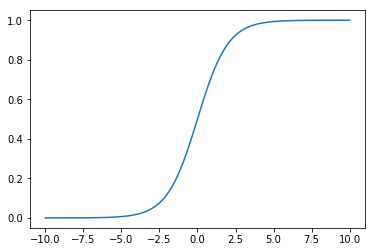

In [81]:
plt.plot(sample_z, sample_a)

In [114]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
        
    def compute(sel, z_val):
        return 1/(1+np.exp(-z_val))

In [83]:
from sklearn.datasets import make_blobs

In [84]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [85]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [86]:
type(data)

tuple

In [87]:
features = data[0]
labels = data[1]

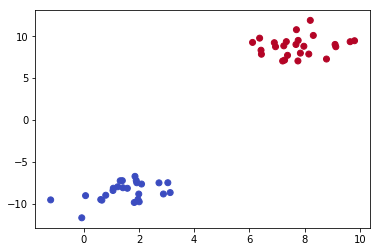

In [90]:
plt.scatter(features[:,0], features[:,1], c= labels, cmap ='coolwarm')

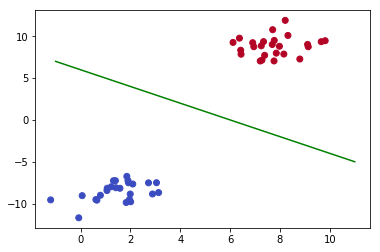

In [99]:
x = np.linspace(-1,11,10)
y = -x +6    #y = mx +c
plt.scatter(features[:,0], features[:,1], c= labels, cmap ='coolwarm')
plt.plot(x,y, 'green')


# (1,1) * f - 5 = 0

In [101]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [103]:
np.array([1,1]).dot(np.array([[2],[-8]])) - 5

array([-11])

In [116]:
g = graph()


In [117]:
g.set_as_default()


In [118]:
x = Placeholder()

In [119]:
w = Variable([1,1])

In [120]:
b = Variable(-5)

In [121]:
z = add(matmul(w,x), b)

In [122]:
a = Sigmoid(z)

In [123]:
sess =Session()

In [124]:
sess.run(operation=a, feed_dict={x:[8,10]})

0.999997739675702

In [125]:
sess.run(operation=a, feed_dict={x:[2,-10]})

2.2603242979035746e-06